# Outlier Detection & Handling Using IQR

#  Identify and handle outliers in a numerical column using the Interquartile Range (IQR) method

# Step 1 — Import Libraries & Generate Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For consistent results
np.random.seed(10)

# Normal values
normal_data = np.random.randint(40, 60, 50)

# Add outliers
outliers = np.array([5, 120, 150])

# Combine data
data = np.concatenate([normal_data, outliers])

# Create DataFrame
df = pd.DataFrame({'value': data})

df.head()


,value
0,49
1,44
2,55
3,40
4,57


# Step 2 — Box Plot BEFORE Handling Outliers

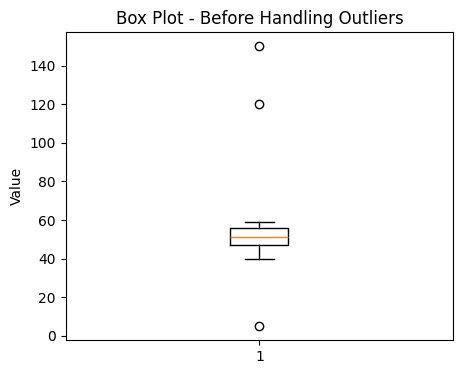

In [2]:
plt.figure(figsize=(5, 4))
plt.boxplot(df['value'])
plt.title("Box Plot - Before Handling Outliers")
plt.ylabel("Value")
plt.show()


# Step 3 — Calculate IQR

In [3]:
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

print("Q1 =", Q1)
print("Q3 =", Q3)
print("IQR =", IQR)


Q1 = 47.0
Q3 = 56.0
IQR = 9.0


# Step 4 — Define Outlier Boundaries

In [4]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound =", lower_bound)
print("Upper Bound =", upper_bound)


Lower Bound = 33.5
Upper Bound = 69.5


# Step 5 — Identify Outliers

In [5]:
outliers_df = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]
outliers_df


,value
50,5
51,120
52,150


# Step 6 — Handle Outliers (Capping)

In [6]:
# Replace outliers with boundary values
df.loc[df['value'] < lower_bound, 'value'] = lower_bound
df.loc[df['value'] > upper_bound, 'value'] = upper_bound

df.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_12488\2841530778.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['value'] < lower_bound, 'value'] = lower_bound


,value
0,49.0
1,44.0
2,55.0
3,40.0
4,57.0


# Step 7 — Box Plot AFTER Handling Outliers

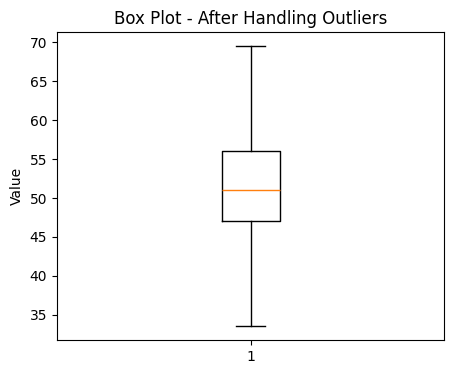

In [7]:
plt.figure(figsize=(5, 4))
plt.boxplot(df['value'])
plt.title("Box Plot - After Handling Outliers")
plt.ylabel("Value")
plt.show()
